In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/aqi_clean.csv")


Matplotlib is building the font cache; this may take a moment.


In [3]:
df.head()
df.describe()


,PM2.5,PM10,NO2,SO2,CO,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,64.510857,109.659366,27.726576,13.830897,2.153872,33.994121,158.781552
std,59.807551,72.324020,23.050531,17.005647,6.724660,20.202304,130.272413
min,0.040000,0.010000,0.010000,0.010000,0.000000,0.010000,13.000000
25%,32.150000,79.315000,12.980000,6.090000,0.540000,20.740000,88.000000
50%,48.570000,95.680000,21.690000,9.160000,0.890000,30.840000,118.000000
75%,72.450000,111.880000,34.665000,13.810000,1.380000,42.730000,179.000000
max,949.990000,1000.000000,362.210000,193.860000,175.810000,257.730000,2049.000000


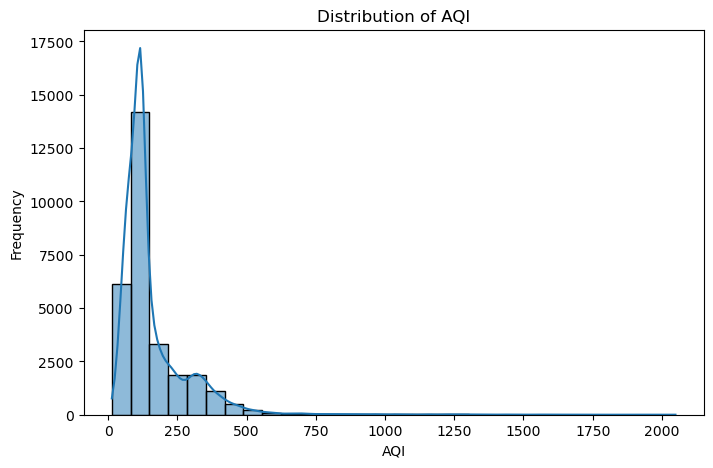

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["AQI"], bins=30, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


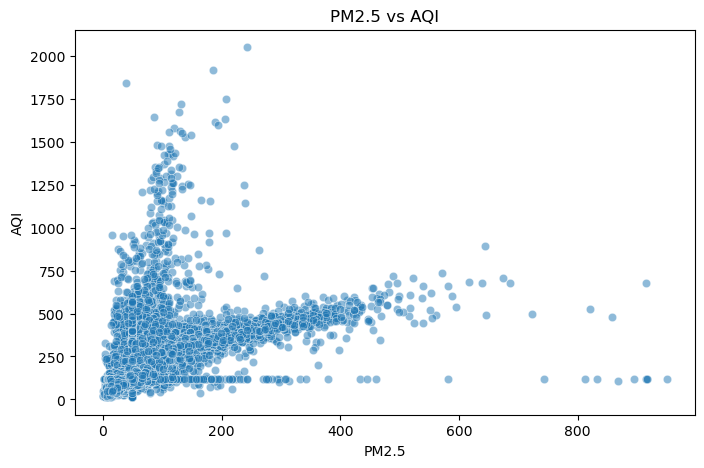

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="PM2.5", y="AQI", data=df, alpha=0.5)
plt.title("PM2.5 vs AQI")
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.show()


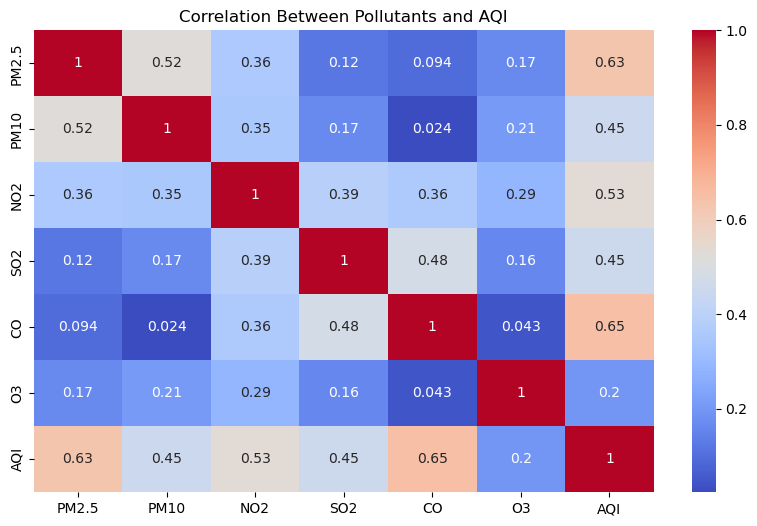

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[["PM2.5","PM10","NO2","SO2","CO","O3","AQI"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Pollutants and AQI")
plt.show()


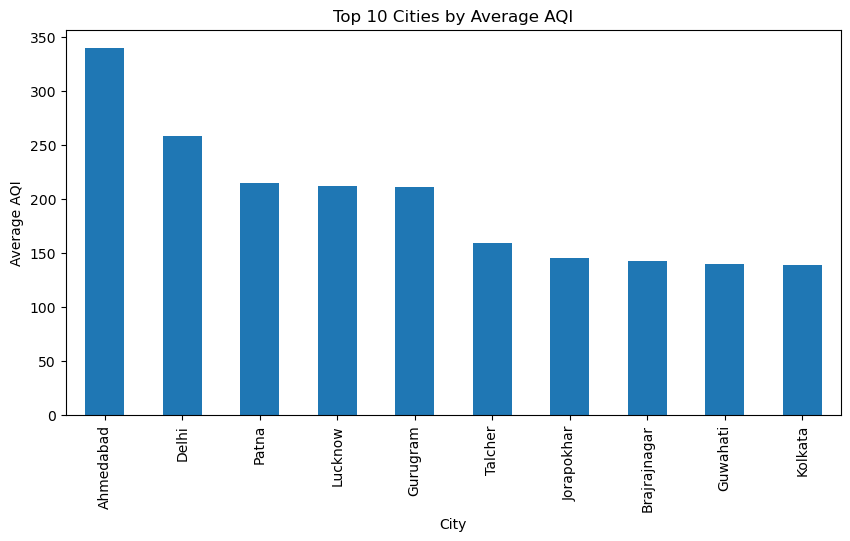

In [12]:
top_cities = (
    df.groupby("City")["AQI"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_cities.plot(kind="bar", figsize=(10,5), title="Top 10 Cities by Average AQI")
plt.ylabel("Average AQI")
plt.show()


In [ ]:
## EDA Insights

- AQI values are right-skewed, indicating frequent high pollution days.
- PM2.5 shows the strongest correlation with AQI.
- PM10 and NO2 also significantly influence AQI.
- Certain cities consistently show higher AQI levels.
